# K means clustering for colors in images   

In [349]:
# 1- import our libraries
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as im

# 1. read an image as array

In [350]:
# read in our image example

image_as_array = mpimg.imread("palm_trees.jpg")

# 2. Perform color quantization using K-Means

In [351]:
type(image_as_array)

numpy.ndarray

In [352]:
# när sista siffran är 3 = bilden är i färg. om 2, monochrom
image_as_array.shape 

(1401, 934, 3)

In [353]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

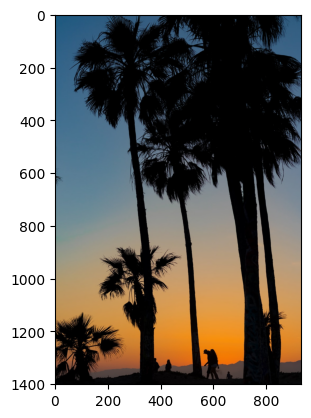

In [354]:
plt.imshow(image_as_array)

In [355]:
(h,w,c)=image_as_array.shape

In [356]:
h

1401

In [357]:
w

934

In [358]:
c

3

In [359]:
total_lines = h*w
total_lines

1308534

In [360]:
# om vi tänker dtype=uint8 i image_as_array, sen upplösning. vi får megabyte
total_lines*8/8/1024/1024

1.247915267944336

## 2.1 Converting Image into array of pixwl Values

In [361]:
# convert our image to 2d image array
image_as_2darray = image_as_array.reshape(h*w, c)
image_as_2darray


array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

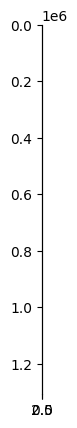

In [362]:
# sammaibld i en kolumn. scientific notation, väldigt lång :)
plt.imshow(image_as_2darray)

In [363]:
image_as_array[0][0]

array([ 25,  89, 127], dtype=uint8)

In [364]:
image_as_array[0][0][0]

np.uint8(25)

In [365]:
image_as_2darray[0][0]

np.uint8(25)

## 2.2 apply KMeans clustering to group the pixels into k color clusters

In [366]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, n_init= "auto", random_state=101)

In [367]:
labels = model.fit_predict(image_as_2darray)
labels

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [368]:
model.cluster_centers_

array([[140.76260068, 144.99289757, 142.69148424],
       [  2.78652477,   2.58764088,   3.69898502],
       [219.39893347, 133.99452084,  44.36949643],
       [ 67.55269226,  61.96746877,  62.32174264],
       [195.32825178, 154.50934682, 105.22306103],
       [ 72.49140408, 110.17023813, 138.0508546 ]])

In [369]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[141, 145, 143],
       [  3,   3,   4],
       [219, 134,  44],
       [ 68,  62,  62],
       [195, 155, 105],
       [ 72, 110, 138]])

In [370]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

## 2.3 Replace each pixel in the image with the centroid of the cluster it belongs to.

In [371]:
final_image = np.reshape(rgb_codes[labels], (h, w, c))
final_image


array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [372]:
model.cluster_centers_

array([[140.76260068, 144.99289757, 142.69148424],
       [  2.78652477,   2.58764088,   3.69898502],
       [219.39893347, 133.99452084,  44.36949643],
       [ 67.55269226,  61.96746877,  62.32174264],
       [195.32825178, 154.50934682, 105.22306103],
       [ 72.49140408, 110.17023813, 138.0508546 ]])

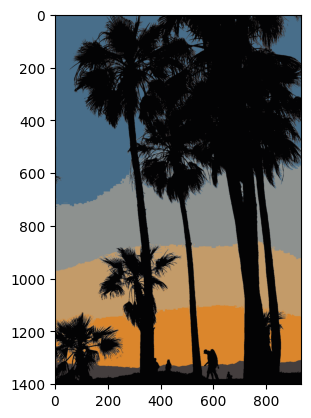

In [373]:
plt.imshow(final_image)

# 3. Convert the Image to black and White

Define a threshold to map pixels to either black or white based on their 
brightness. 

## using Kmeans_cluster 2, and recode cluster colors manually

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, n_init= "auto", random_state=101)

labels = model.fit_predict(image_as_2darray)
model.cluster_centers_
color_codes = model.cluster_centers_.round(0).astype(int)
color_codes

array([[144, 132, 114],
       [  6,   6,   7]])

In [375]:
color_codes[0] = 255 
color_codes[1] = 0 
color_codes

array([[255, 255, 255],
       [  0,   0,   0]])

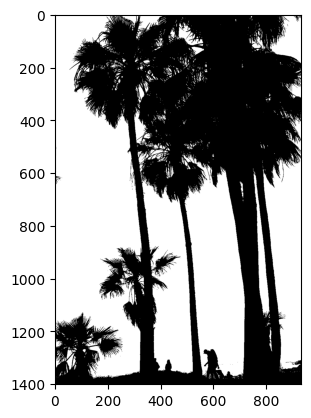

In [427]:
color_codes[labels]
## 2.3 Replace each pixel in the image with the centroid of the cluster it belongs to.
final_image = np.reshape(color_codes[labels], (h, w, c))
blk_wt_pic = plt.imshow(final_image)

## Binarize using PIL method

In [ ]:
# found on https://www.kdnuggets.com/numpy-for-image-processing

# Load the image using PIL (Python Imaging Library)
img = im.open('palm_trees.jpg')

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image to a NumPy array
img_array = np.array(img_gray)

# Binarize the image using a threshold
threshold = 70
binary_img = np.where(img_array < threshold, 0, 255).astype(np.uint8)


array([[74, 74, 74, ..., 55, 83, 82],
       [74, 74, 74, ..., 63, 80, 81],
       [74, 74, 74, ..., 71, 76, 79],
       ...,
       [ 4,  4,  4, ...,  9,  9,  9],
       [ 3,  3,  3, ...,  8,  8,  8],
       [ 4,  4,  4, ...,  9, 10, 10]], dtype=uint8)

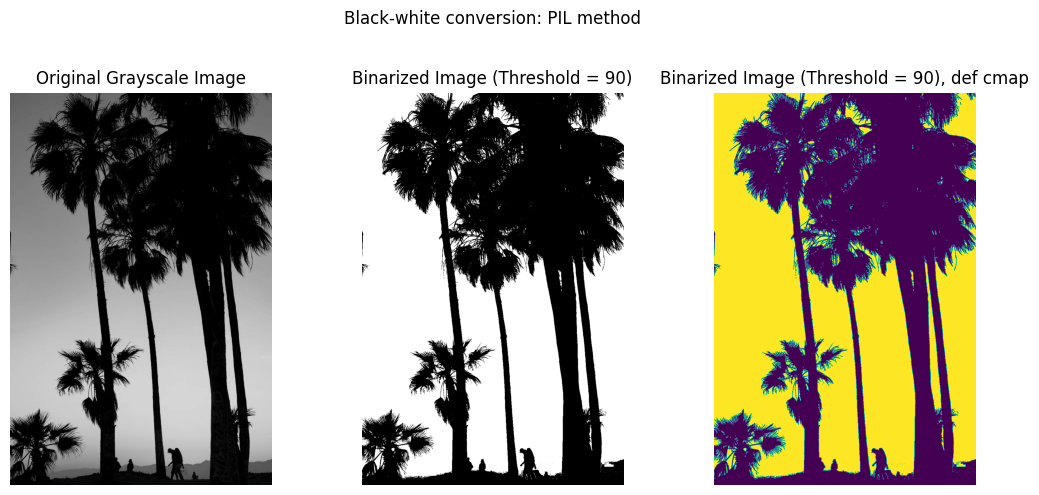

In [481]:
# Display the original and binarized images
plt.figure(figsize= (18, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 1, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binarized Image (Threshold = 90)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img)
plt.title('Binarized Image (Threshold = 90), def cmap')
plt.axis('off')

plt.suptitle("Black-white conversion: PIL method")
plt.tight_layout()
plt.show() 

# 4. Detect contours (if possible): 
Use simple mathematical techniques like detecting edges by calculating pixel 
intensity differences.

In [403]:
model = KMeans(n_clusters=3, n_init= "auto", random_state=101)

blk_wt_3darray = blk_wt_pic.get_array()
blk_wt_3darray

blk_wt_2darray = blk_wt_3darray.reshape(h*w, c)
blk_wt_2darray

masked_array(
  data=[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],
  mask=False,
  fill_value=np.int64(999999),
  dtype=uint8)

## solution with Pillow

In [421]:
from PIL import Image, ImageFilter

In [423]:
filename = "testrgb.png"
with Image.open(filename) as img:
    img.load()

In [424]:
new_pic = img.convert("L")
edges = new_pic.filter(ImageFilter.FIND_EDGES)
edges.show()